In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as Tfuns

import matplotlib.pyplot as plt

# Linear regression for the Boston housing and diabetes data sets

The following block of code loads either the Boston housing data set or the diabetes data set. The former is a classic regression data set used to predict price on the basis of house attributes while the latter is used to predict diabetes disease progression on the basis of various physiological measurments.

The following block of code extracts the the data and splits it into 80% training and 20% testing.

For both data sets, perform Ridge and Lasso regression (using sklearn for simplicity) for a range of different regularization strenghs (logarithmically spaced). Plot the following as a function of regularization strength.

1) The coefficient magnitudes for Ridge.

2) The coefficient magnitudes for Lasso.

3) The R2 (https://en.wikipedia.org/wiki/Coefficient_of_determination) measure of quality of fit for both training and test data.

Which value of the regularization parameter should be used for Lasso? Which value should be used for Ridge? Answer this for both data sets. Do the different types of regularization behave differently for these two data sets? If so, how? I'm asking these specific questions, but regularization impacts these two problems differently and I want you to generally show my how and tell me what you see.

Note that this problem closely follows part of the material from the Mehta "NB3_CVI-linreg_diabetes". But there are some substantive differences between results on these two data sets.


In [9]:
# Load Boston housing data
from sklearn.datasets import load_boston ,  load_diabetes
from sklearn import linear_model

X, y = load_boston(return_X_y=True)
# X, y = load_diabetes(return_X_y=True)

num_data = X.shape[0]

n_samples_train = round(0.8*num_data)
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

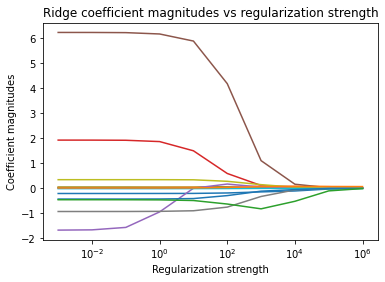

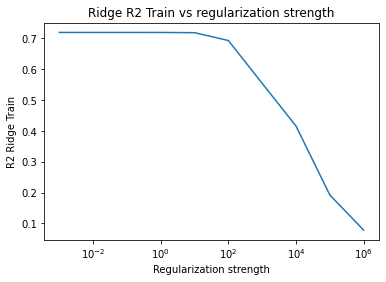

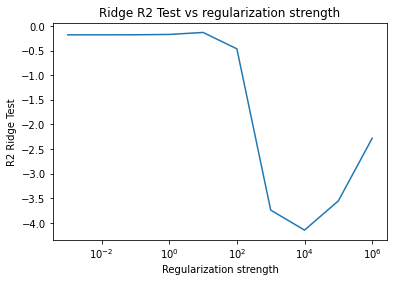

c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4736.788860990343, tolerance: 27.076071000000002
  model = cd_fast.enet_coordinate_descent(
c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3623.7758551583192, tolerance: 27.076071000000002
  model = cd_fast.enet_coordinate_descent(


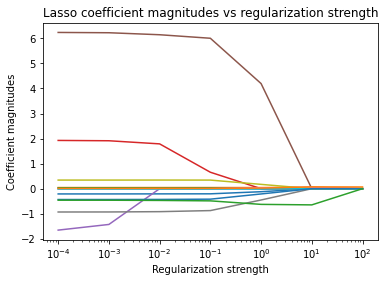

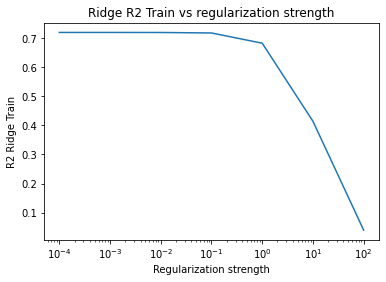

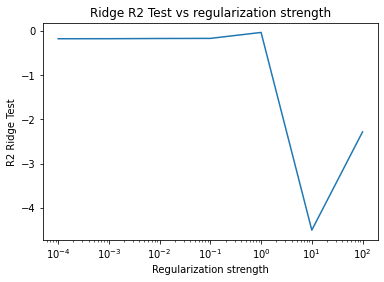

In [14]:
# Perform Ridge regression
# alpha is the regularization strength
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
ridge_coefs = []
lasso_coefs = []
R2_ridge_test = []
R2_ridge_train = []
R2_lasso_test = []
R2_lasso_train = []


for i in alpha:
    ridge = linear_model.Ridge(alpha = i, fit_intercept=False)
    ridge.fit(X_train,y_train)
    ridge_coefs.append(ridge.coef_)
    R2_ridge_test.append(ridge.score(X_test,y_test))
    R2_ridge_train.append(ridge.score(X_train,y_train))
    
ax1 = plt.gca()
ax1.plot(alpha, ridge_coefs)
ax1.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Coefficient magnitudes')    
plt.title('Ridge coefficient magnitudes vs regularization strength')
plt.show()

ax2 = plt.gca()
ax2.plot(alpha, R2_ridge_train)
ax2.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Train')    
plt.title('Ridge R2 Train vs regularization strength')
plt.show()

ax3 = plt.gca()
ax3.plot(alpha, R2_ridge_test)
ax3.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Test')    
plt.title('Ridge R2 Test vs regularization strength')
plt.show()
    
# Perform Lasso regression
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha:
    lasso = linear_model.Lasso(alpha = i, fit_intercept=False)
    lasso.fit(X_train,y_train)
    lasso_coefs.append(lasso.coef_)
    R2_lasso_test.append(lasso.score(X_test,y_test))
    R2_lasso_train.append(lasso.score(X_train,y_train))
    
ax4 = plt.gca()
ax4.plot(alpha, lasso_coefs)
ax4.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Coefficient magnitudes')    
plt.title('Lasso coefficient magnitudes vs regularization strength')
plt.show()

ax5 = plt.gca()
ax5.plot(alpha, R2_lasso_train)
ax5.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Train')    
plt.title('Ridge R2 Train vs regularization strength')
plt.show()

ax6 = plt.gca()
ax6.plot(alpha, R2_lasso_test)
ax6.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Test')    
plt.title('Ridge R2 Test vs regularization strength')
plt.show()

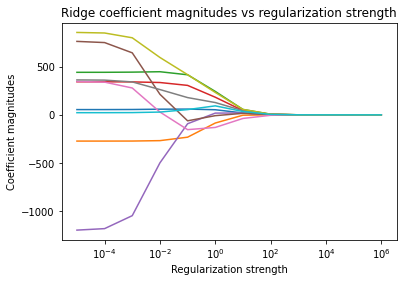

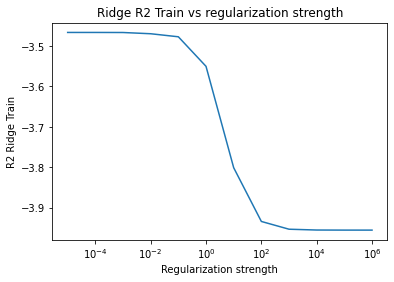

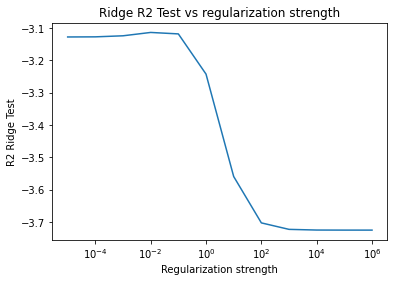

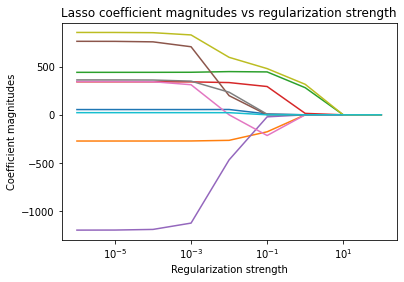

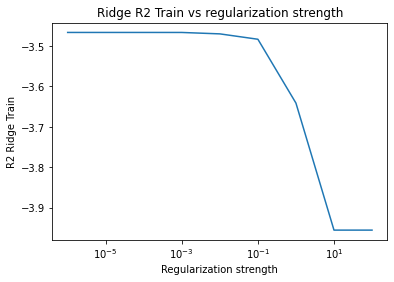

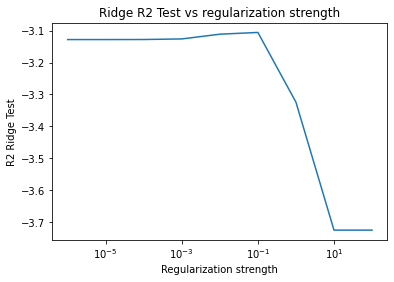

In [17]:
# Load diabetes housing data
from sklearn.datasets import load_boston ,  load_diabetes
from sklearn import linear_model


X, y = load_diabetes(return_X_y=True)

num_data = X.shape[0]

n_samples_train = round(0.8*num_data)
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

# Perform Ridge regression
# alpha is the regularization strength
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
ridge_coefs = []
lasso_coefs = []
R2_ridge_test = []
R2_ridge_train = []
R2_lasso_test = []
R2_lasso_train = []


for i in alpha:
    ridge = linear_model.Ridge(alpha = i, fit_intercept=False)
    ridge.fit(X_train,y_train)
    ridge_coefs.append(ridge.coef_)
    R2_ridge_test.append(ridge.score(X_test,y_test))
    R2_ridge_train.append(ridge.score(X_train,y_train))
    
ax1 = plt.gca()
ax1.plot(alpha, ridge_coefs)
ax1.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Coefficient magnitudes')    
plt.title('Ridge coefficient magnitudes vs regularization strength')
plt.show()

ax2 = plt.gca()
ax2.plot(alpha, R2_ridge_train)
ax2.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Train')    
plt.title('Ridge R2 Train vs regularization strength')
plt.show()

ax3 = plt.gca()
ax3.plot(alpha, R2_ridge_test)
ax3.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Test')    
plt.title('Ridge R2 Test vs regularization strength')
plt.show()
    
# Perform Lasso regression
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha:
    lasso = linear_model.Lasso(alpha = i, fit_intercept=False)
    lasso.fit(X_train,y_train)
    lasso_coefs.append(lasso.coef_)
    R2_lasso_test.append(lasso.score(X_test,y_test))
    R2_lasso_train.append(lasso.score(X_train,y_train))
    
ax4 = plt.gca()
ax4.plot(alpha, lasso_coefs)
ax4.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Coefficient magnitudes')    
plt.title('Lasso coefficient magnitudes vs regularization strength')
plt.show()

ax5 = plt.gca()
ax5.plot(alpha, R2_lasso_train)
ax5.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Train')    
plt.title('Ridge R2 Train vs regularization strength')
plt.show()

ax6 = plt.gca()
ax6.plot(alpha, R2_lasso_test)
ax6.set_xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('R2 Ridge Test')    
plt.title('Ridge R2 Test vs regularization strength')
plt.show()

***************
# Questions
Which value of the regularization parameter should be used for Lasso? Which value should be used for Ridge? Answer this for both data sets. Do the different types of regularization behave differently for these two data sets? If so, how? I'm asking these specific questions, but regularization impacts these two problems differently and I want you to generally show my how and tell me what you see.

Boston dataset
From the plots, the coefficients become distinct and different at the following parameters:

Lasso regularization parameter: 0.001
Ridge regularization parameter: 0.1

Diabetes dataset
From the plots, the coefficients become distinct and different at the following parameters:

Lasso regularization parameter: 0.0001
Ridge regularization parameter: 0.0001

The different types of regularization do behave differently for the data sets. Based on the plots, the coefficients converge at different alphas (regularization strengths). For the Boston data, The Lasso (L1) converges at a smaller alpha than the Ridge (L2) regularization. These regularization parameters are both larger for the Boston dataset than the diabetes dataset.

# Softmax (aka multinomial logistic) regression in pytorch for MNIST digit classification. - HOMEWORK

Here we're going to use the MNIST data set consisting of images of the digits 0-9 as a test case for performing soft classification using softmax classification. While pytorch is overkill for performing performing simple regression, we will use it here as a starting point that you can build from to solve more complex problems for which simple packages are insufficient. Construct code for the following steps.

1) Import the MNIST data set using the torchvision.datasets library (I've done this for you below). 

2) Create an iterable data set using the torch utility "DataLoader". You can find many examples of this, but in short, what it does is break the large-ish data set into a collection of mini-batches that can be iterated over. Each batch is stored as a python tuple (image,label).

3) Create a model class with an __init__ constructor and forward method.

4) Initialize the torch.optim.SGD optimizer with a learning rate of 0.001. Initialize the loss function using torch.nn.CrossEntropyLoss().

5) Run SGD on the model with the batched data and output the training and test errors as a function of update iteration.

In the cells below, I've left some text cues for things that need to be done.

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as Tfuns

import torchvision.transforms as transforms # Common image transforms. Will use this to transform images to tensors
import torchvision.datasets as dsets # Will pull MNIST data from this.

Label = 0


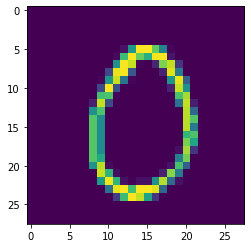

In [4]:
# Load data and transform to tensors. This produces collection of tuples (img-tensor, digit label)
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download = True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download = True)

img , lbl = train_dataset[210]
print('Label = ' + str(lbl))

plt.imshow(np.squeeze(img.numpy()))

In [5]:
batch_size = 100 # Self explanatory

# Break your training and test data into training and test data. Make sure to shuffle the training data.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Use the next snippet of code to peruse the batched dataset that you just created.

1) How many batches are there?

2) What is the shape of the "images" tensor that comes out for each iteration? Note that this is storing a batch of images in a tensor form. 

3) What is the shape of the first element of that tensor? You'll notice that each image is stored as essentially a matrix. This makes sense as it is an image! But we really want it to take the form of a vector for purposes of input into the model. The .view(-1,28*28) method will be helpful here. Each image is a 28 x 28 pixel image. This call just converts each 28x28 square image into a 1x(28*28) vector (in tensor form of course). You'll need to do this later before you feed each image to the forward method of your model. Remember, the model wants a vector, not a matrix.

In [6]:

# Here is a little snippet of code that allows you to iterate over the batches.
iter = 0
for i, (images, labels) in enumerate(train_loader):
    iter+=1
    
print("Number of batches: ",iter)
inputs = np.array(images)
print("Shape of images tensor: ",images.shape)

v = images.view(-1,28*28)
inputs = np.array(v[0])
print("Shape of first element of tensor: ",v[0].shape)


Number of batches:  600
Shape of images tensor:  torch.Size([100, 1, 28, 28])
Shape of first element of tensor:  torch.Size([784])


In [7]:
# Build your model class here. Initialize a single layer, linear neural network from the torch.nn library. The 
# forward evaluation method of course is just the application of that layer to the input x. Note that "x" should
# be thought of as a vector, not a matrix here.
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        
        
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # This is the forward pass in the funciton evaluation
        outputs = self.linear(x)
        return outputs

In [8]:
epochs = 5
input_dim = 784
output_dim = 10
lr_rate = 0.001

# Instantiate your model model here with an input dimension of 784 (the number of image pixels) and an output
# dimension of 10 (number of classes). 
model = LogisticRegression(784,10)
out = model.forward(v)

# Initialize your loss function as torch.nn.CrossEntropyLoss

loss_fun = torch.nn.CrossEntropyLoss()

# Initilaze your optimizer as torch.optim.SGD with a learning rate of 0.001. 
# As some extra exploration, try Adam too. And check how the lr affects things.

optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)


In [41]:
# Complete 5 full epochs where, in each epoch, you iterate over the entire collection of minibatches.
# In each epoch and for each batch, convert each image to a "vector" using the .view method mentioned above.
# Then apply the model to the image to get a predicted output. Then feed that output through the loss_fun to 
# calculate the cross entropy loss. Then apply the loss.backward() command to create gradients for backpropogation.
# Finally take a step forward with the optimizer.step(). 

# Every 100 batch iterations, calculate your training error and test error. When I say error, I mean actuall
# classification error, not loss. That is, for each image, have the model tell you what class it thinks it is,
# and then compare to the actuall class. Then count the fraction it gets right. You'll need a snippet of code to 
# do this. I recommend coding a small function for this that you can call. You should end up with accuracy in the 80-85% range.

# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))

Iteration: 100. Loss: 2.1669983863830566. Accuracy: 44.76.
Iteration: 200. Loss: 2.040076494216919. Accuracy: 56.57.
Iteration: 300. Loss: 1.8964757919311523. Accuracy: 63.27.
Iteration: 400. Loss: 1.8803483247756958. Accuracy: 67.69.
Iteration: 500. Loss: 1.7873562574386597. Accuracy: 70.26.
Iteration: 600. Loss: 1.725038766860962. Accuracy: 72.03.
Iteration: 700. Loss: 1.7605528831481934. Accuracy: 73.36.
Iteration: 800. Loss: 1.5396462678909302. Accuracy: 74.25.
Iteration: 900. Loss: 1.5094352960586548. Accuracy: 75.2.
Iteration: 1000. Loss: 1.571617603302002. Accuracy: 75.76.
Iteration: 1100. Loss: 1.4584319591522217. Accuracy: 76.39.
Iteration: 1200. Loss: 1.4550737142562866. Accuracy: 77.12.
Iteration: 1300. Loss: 1.3383307456970215. Accuracy: 77.66.
Iteration: 1400. Loss: 1.351590633392334. Accuracy: 78.4.
Iteration: 1500. Loss: 1.2969399690628052. Accuracy: 78.97.
Iteration: 1600. Loss: 1.3669601678848267. Accuracy: 79.52.
Iteration: 1700. Loss: 1.2060788869857788. Accuracy: 79

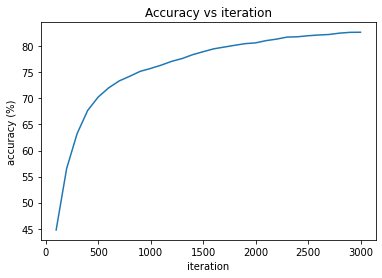

In [46]:
# Postprocess your results. Plot accuracy versus training iteration. Adjust the optimizer and the batch size.
# Try including regularization. Just use Ridge as Lasso is more complicated in torch. You do not need to show me 
# every iteration of results. Instead, provide some text about what you have found and show some results so that I
# I can see that you have figured out how to do this.

iter_array = np.linspace(100,3000,30)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()


Iteration: 100. Loss: 0.8742445111274719. Accuracy: 83.8.
Iteration: 200. Loss: 0.759662389755249. Accuracy: 84.76.
Iteration: 300. Loss: 0.6944189667701721. Accuracy: 85.5.
Iteration: 400. Loss: 0.6576353311538696. Accuracy: 85.98.
Iteration: 500. Loss: 0.7020515203475952. Accuracy: 86.43.
Iteration: 600. Loss: 0.5942364931106567. Accuracy: 86.81.
Iteration: 700. Loss: 0.56479811668396. Accuracy: 87.08.
Iteration: 800. Loss: 0.5837213397026062. Accuracy: 87.32.
Iteration: 900. Loss: 0.5106541514396667. Accuracy: 87.45.
Iteration: 1000. Loss: 0.5659053325653076. Accuracy: 87.64.
Iteration: 1100. Loss: 0.7914357781410217. Accuracy: 87.66.
Iteration: 1200. Loss: 0.6187988519668579. Accuracy: 87.89.
Iteration: 1300. Loss: 0.5074750185012817. Accuracy: 87.92.
Iteration: 1400. Loss: 0.5017386078834534. Accuracy: 88.09.
Iteration: 1500. Loss: 0.4796715974807739. Accuracy: 88.12.
Iteration: 1600. Loss: 0.4706244170665741. Accuracy: 88.39.
Iteration: 1700. Loss: 0.4522660970687866. Accuracy: 8

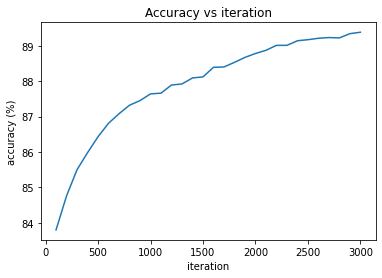

In [47]:
# Adjust optimizer and batch size

# higher learning rate

batch_size = 100
epochs = 5
input_dim = 784
output_dim = 10
lr_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)


# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))
            
            
# Plot accuracy vs iteration            
iter_array = np.linspace(100,3000,30)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()

Iteration: 100. Loss: 0.7236030101776123. Accuracy: 86.77.
Iteration: 200. Loss: 0.6300987005233765. Accuracy: 86.75.
Iteration: 300. Loss: 0.6321993470191956. Accuracy: 86.8.
Iteration: 400. Loss: 0.6775161027908325. Accuracy: 86.9.
Iteration: 500. Loss: 0.6725040674209595. Accuracy: 86.79.
Iteration: 600. Loss: 0.5665733218193054. Accuracy: 86.87.
Iteration: 700. Loss: 0.5256001353263855. Accuracy: 86.85.
Iteration: 800. Loss: 0.5741516947746277. Accuracy: 86.89.
Iteration: 900. Loss: 0.6541612148284912. Accuracy: 86.92.
Iteration: 1000. Loss: 0.7027550339698792. Accuracy: 86.9.
Iteration: 1100. Loss: 0.5707654356956482. Accuracy: 86.98.
Iteration: 1200. Loss: 0.7275038957595825. Accuracy: 86.96.
Iteration: 1300. Loss: 0.5805565714836121. Accuracy: 87.05.
Iteration: 1400. Loss: 0.626827597618103. Accuracy: 87.12.
Iteration: 1500. Loss: 0.6606183052062988. Accuracy: 87.14.
Iteration: 1600. Loss: 0.5464255809783936. Accuracy: 87.12.
Iteration: 1700. Loss: 0.4854552149772644. Accuracy: 

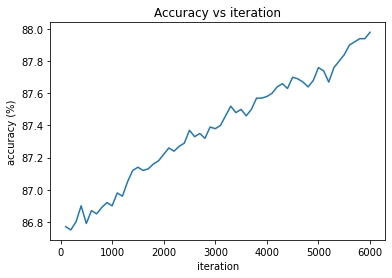

In [11]:
# Adjust optimizer and batch size

# smaller batch size

batch_size = 50
epochs = 10
input_dim = 784
output_dim = 10
lr_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)


# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))
            
            
# Plot accuracy vs iteration            
iter_array = np.linspace(100,6000,60)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()

In [12]:
# Using RMS prop optimizer

batch_size = 100
epochs = 5
input_dim = 784
output_dim = 10
lr_rate = 0.001
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr_rate)


# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))
            
  

Iteration: 100. Loss: 0.4013214409351349. Accuracy: 90.04.
Iteration: 200. Loss: 0.35650116205215454. Accuracy: 90.65.
Iteration: 300. Loss: 0.5401157140731812. Accuracy: 90.89.
Iteration: 400. Loss: 0.21726670861244202. Accuracy: 91.19.
Iteration: 500. Loss: 0.23767787218093872. Accuracy: 91.55.
Iteration: 600. Loss: 0.3240486979484558. Accuracy: 91.43.
Iteration: 700. Loss: 0.2640943229198456. Accuracy: 91.54.
Iteration: 800. Loss: 0.24563100934028625. Accuracy: 91.55.
Iteration: 900. Loss: 0.3408857583999634. Accuracy: 91.86.
Iteration: 1000. Loss: 0.29421207308769226. Accuracy: 91.89.
Iteration: 1100. Loss: 0.5576589107513428. Accuracy: 92.0.
Iteration: 1200. Loss: 0.2756732702255249. Accuracy: 92.1.
Iteration: 1300. Loss: 0.4506252408027649. Accuracy: 92.02.
Iteration: 1400. Loss: 0.36429449915885925. Accuracy: 92.07.
Iteration: 1500. Loss: 0.26600924134254456. Accuracy: 91.87.
Iteration: 1600. Loss: 0.26055651903152466. Accuracy: 92.12.
Iteration: 1700. Loss: 0.27316197752952576.

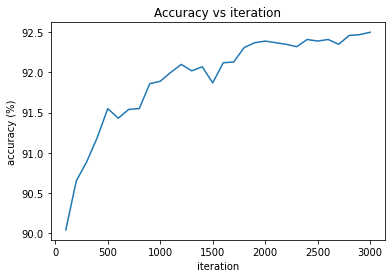

In [13]:
          
# Plot accuracy vs iteration            
iter_array = np.linspace(100,3000,30)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()

Iteration: 100. Loss: 0.2485288828611374. Accuracy: 92.47.
Iteration: 200. Loss: 0.3881106674671173. Accuracy: 92.44.
Iteration: 300. Loss: 0.3330227732658386. Accuracy: 92.64.
Iteration: 400. Loss: 0.16667446494102478. Accuracy: 92.45.
Iteration: 500. Loss: 0.3244653344154358. Accuracy: 92.54.
Iteration: 600. Loss: 0.20594839751720428. Accuracy: 92.49.
Iteration: 700. Loss: 0.15265993773937225. Accuracy: 92.53.
Iteration: 800. Loss: 0.23705442249774933. Accuracy: 92.63.
Iteration: 900. Loss: 0.2416655570268631. Accuracy: 92.55.
Iteration: 1000. Loss: 0.2625548541545868. Accuracy: 92.44.
Iteration: 1100. Loss: 0.30648064613342285. Accuracy: 92.48.
Iteration: 1200. Loss: 0.4009905159473419. Accuracy: 92.53.
Iteration: 1300. Loss: 0.2673674523830414. Accuracy: 92.58.
Iteration: 1400. Loss: 0.24381323158740997. Accuracy: 92.61.
Iteration: 1500. Loss: 0.19174495339393616. Accuracy: 92.62.
Iteration: 1600. Loss: 0.17903687059879303. Accuracy: 92.65.
Iteration: 1700. Loss: 0.3011256456375122

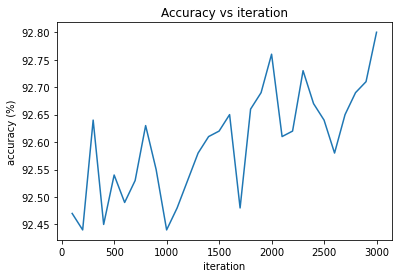

In [14]:
# Using ADAM optimizer

batch_size = 100
epochs = 5
input_dim = 784
output_dim = 10
lr_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)


# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))
            
            
# Plot accuracy vs iteration            
iter_array = np.linspace(100,3000,30)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()

Iteration: 100. Loss: 0.24038653075695038. Accuracy: 92.82.
Iteration: 200. Loss: 0.16144266724586487. Accuracy: 92.82.
Iteration: 300. Loss: 0.21699197590351105. Accuracy: 92.82.
Iteration: 400. Loss: 0.1224655881524086. Accuracy: 92.83.
Iteration: 500. Loss: 0.2436903715133667. Accuracy: 92.82.
Iteration: 600. Loss: 0.2287367284297943. Accuracy: 92.84.
Iteration: 700. Loss: 0.1839967668056488. Accuracy: 92.82.
Iteration: 800. Loss: 0.2168513834476471. Accuracy: 92.82.
Iteration: 900. Loss: 0.16183006763458252. Accuracy: 92.82.
Iteration: 1000. Loss: 0.29226502776145935. Accuracy: 92.82.
Iteration: 1100. Loss: 0.09297741949558258. Accuracy: 92.84.
Iteration: 1200. Loss: 0.27526968717575073. Accuracy: 92.82.
Iteration: 1300. Loss: 0.3255379796028137. Accuracy: 92.82.
Iteration: 1400. Loss: 0.118759386241436. Accuracy: 92.82.
Iteration: 1500. Loss: 0.2572309374809265. Accuracy: 92.82.
Iteration: 1600. Loss: 0.3214472532272339. Accuracy: 92.81.
Iteration: 1700. Loss: 0.1513998657464981. 

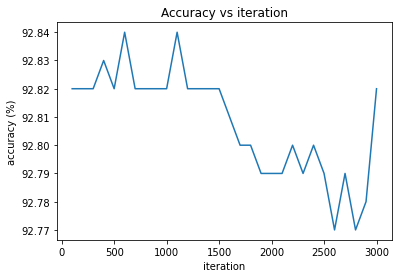

In [15]:
# Try including regularization. using Ridge 

batch_size = 100
epochs = 5
input_dim = 784
output_dim = 10
lr_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate, weight_decay = 1e-5)


# Plot your training and test error as a function of iteration. Now change the learning rate (higher and lower)
# and change the batch sizes. You can use the %%time command above to time the algorithm in each case.
# Note that you will need to change the number of epochs as you alter the batch size since the number of 
# optimizer updates is #batch * #epoch. What observations can you make about altering the learning rate or batch size. 
# Can you do better with a different optimizer like RMSprop or ADAM?

iter = 0
acc_keep = np.array([])
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
        
        # You'll need this for technical reasons to ensure the optimizer doesn't accumulate gradients.
        optimizer.zero_grad() 
        
        # Forward pass.
        outputs = model(images)
        # Calculate loss.
        loss = loss_fun(outputs,labels)
        # Backward pass.
        loss.backward()
        # Optimizer update.
        optimizer.step()
        # Every so often, calculate training and test errors.
        
        iter+=1
        if iter%100==0:
        # calculate accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1,28*28) # Reshape the matrix of pixel values to a 1x784 tensor
                outputs = model(images)
                _, predicted = torch.max(outputs.data,1)
                total+= labels.size(0)
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct.numpy()/total
            acc_keep = np.append(acc_keep,accuracy)
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter,loss.item(),accuracy))
            
            
# Plot accuracy vs iteration            
iter_array = np.linspace(100,3000,30)
ax1 = plt.gca()
ax1.plot(iter_array, acc_keep)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')    
plt.title('Accuracy vs iteration')
plt.show()

# Questions/Analysis

What observations can you make about altering the learning rate or batch size. 
Can you do better with a different optimizer like RMSprop or ADAM?

A higher learning rate or a smaller batch size increased the accuracy of the model. RMSprop and ADAM both increased the accuracy compared to the SGD optimizer. Using the ridge regularization, there was also a higher accuracy and it started off accurate vs iterating to get a higher accuracy.


# End of Assignment Metacognition questions.

Briefly answer these two questions. A few sentences or more is sufficient on each.

1) What did you learn as part of this assignment (hopefully something)? Be more specific than usual here. You applied lots of different methods with different learning rates and so forth to different types of optimization problems. Does a particular type of method seem to perform better on one type than another? 

2) What questions do you still have or is there something you still don't grasp? 

If you understand everything, already knew all of this, did not learn anything new, and don't have any questions, great! Instead of answering the above questions, instead write me a new question (with full solutions) that you think would help illustrate one or more of the points above.

*******************************
1) As part of this assignment, I learned what ridge and lasso regression are and how these work to fit a model, how to define a class model, and how to use the torch package. It seems that the SGD optimizer performed the worst compared to the RMS prop and ADAM optimizer. Also, a smaller batch size and higher learning rate resulted in better accuracy.

2) Something that I still do not grasp is exactly how all the optimizers/regularization methods work. 